# API 12: Checkpoint, save & load model

Whenever the KAN (model) is altered (e.g., fit, prune ...), a new version is saved to the model.ckpt folder (by default 'model'). The version number is 'a.b', where a is the round number (starting from zero, +1 when model.rewind() is called), b is the version number in each round. 

the initialized model has version 0.0

checkpoint directory created: ./model
saving model version 0.0


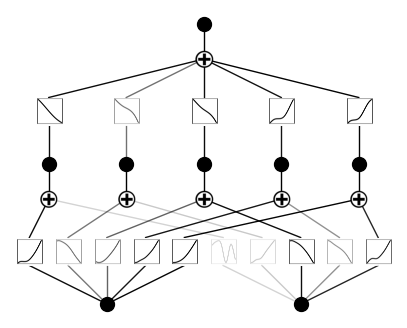

In [4]:
from kan import *
import torch

f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
model = KAN(width=[2,5,1], grid=5, k=3, seed=2, auto_save=True)
model.get_act(dataset)
model.plot()

the auto_save is on (by default)

In [5]:
model.auto_save

True

After fitting, the version becomes 0.1

| train_loss: 3.20e-02 | test_loss: 3.11e-02 | reg: 6.97e+00 | : 100%|█| 20/20 [00:15<00:00,  1.30it


saving model version 0.1


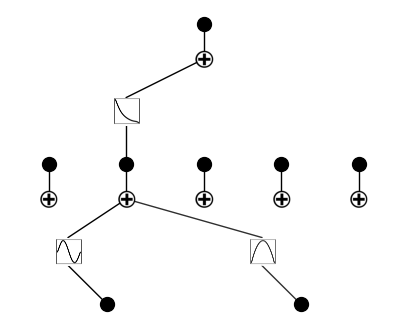

In [6]:
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.01);
model.plot()

After pruning, the version becomes 0.2

saving model version 0.2


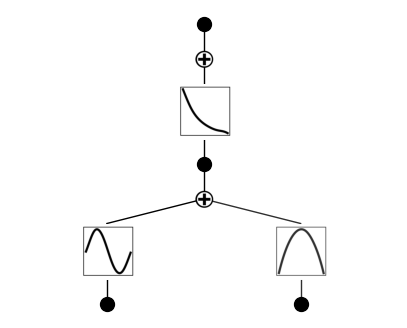

In [7]:
model = model.prune()
model.plot()

Suppose we want to revert back to version 0.1, use model = model.rewind('0.1'). This starts a new round, meaning version 0.1 renamed to version 1.1.

rewind to model version 0.1, renamed as 1.1


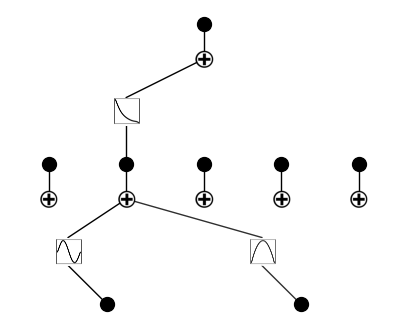

In [8]:
# revert to version 0.1 (if continuing)
model = model.rewind('0.1')

# revert to version 0.1 (if starting from scratch)
#model = KAN.loadckpt('./model' + '0.1')
#model.get_act(dataset)

model.plot()

Suppose we do some more manipulation to version 1.1, we will roll forward to version 1.2

| train_loss: 2.48e-02 | test_loss: 2.44e-02 | reg: 7.35e+00 | : 100%|█| 2/2 [00:01<00:00,  1.21it/s


saving model version 1.2


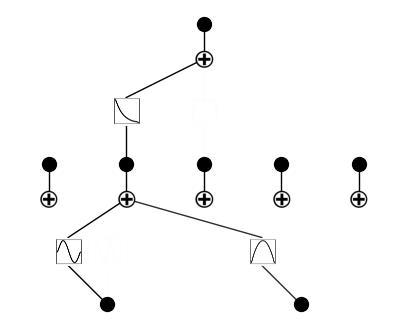

In [9]:
model.fit(dataset, opt="LBFGS", steps=2);
model.plot()